<a href="https://colab.research.google.com/github/cdmafAdi/DL_NOTES-/blob/main/CNN/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

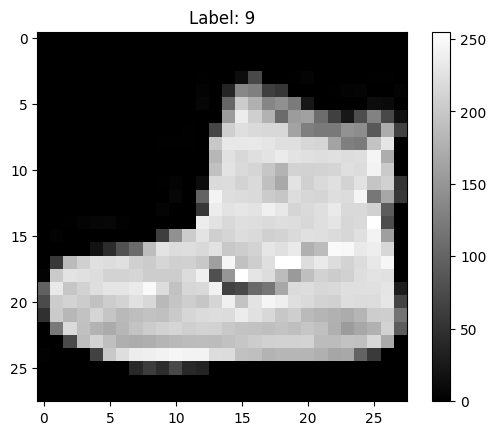

In [9]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.show()


In [4]:
x_train.shape

(60000,)

# Step 4: Preprocessing (VERY IMPORTANT)


In [10]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [13]:
model = Sequential([

                    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
                    layers.MaxPool2D(2,2),

                    layers.Conv2D(64, (3,3), activation='relu'),
                    layers.MaxPool2D(2,2),

                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=10,batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8814 - loss: 0.3278 - val_accuracy: 0.8840 - val_loss: 0.3157
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8953 - loss: 0.2844 - val_accuracy: 0.8933 - val_loss: 0.2963
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 59ms/step - accuracy: 0.9046 - loss: 0.2578 - val_accuracy: 0.8951 - val_loss: 0.2846
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.9125 - loss: 0.2354 - val_accuracy: 0.9012 - val_loss: 0.2739
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9232 - loss: 0.2071 - val_accuracy: 0.9089 - val_loss: 0.2561
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9312 - loss: 0.1904 - val_accuracy: 0.9098 - val_loss: 0.2515
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9354 - loss: 0.1733 - val_accuracy: 0.9154 - val_loss: 0.2401
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9442 - loss: 0.1528 - 

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9118 - loss: 0.2804
Test Accuracy: 0.9108999967575073


KeyError: 'val_acccruacy'

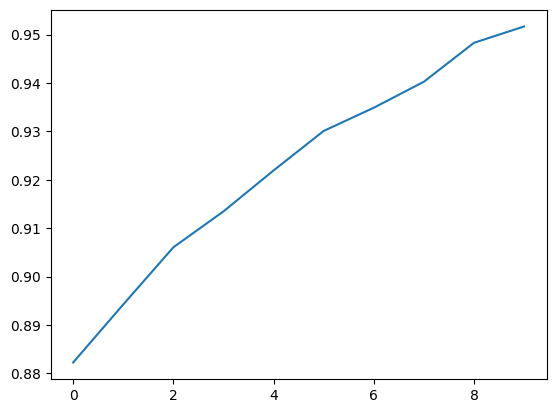

In [18]:
plt.plot(history.history['accuracy'], label='Train accuracy'),
plt.plot(history.history['val_acccruacy'], label = 'Val accuracy'),
plt.xlabel("Epochs"),
plt.ylabel('accuracy'),
plt.legend()
plt.show()
